In [1]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-01-23.csv', header=None)

In [3]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-01-23/"+str(i)+"/data_structures_NQI_results2018-01-23.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [4]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


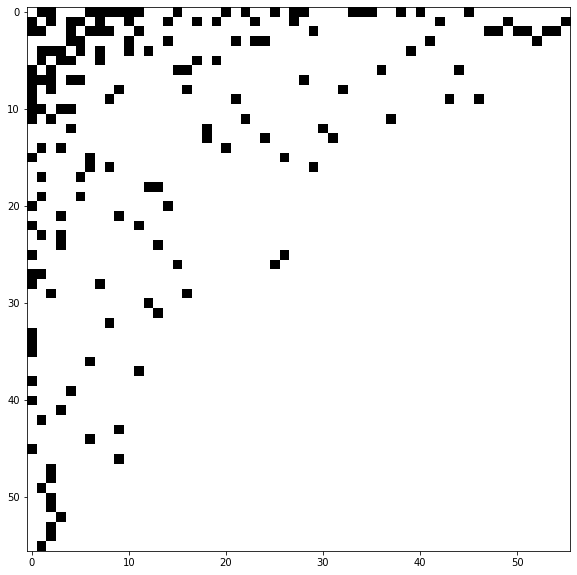

In [13]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [6]:
# import the simulated network
# load the dict of dataframes
with open('simulation_50/simulation_50_20_2.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [7]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_50/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_50/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_50/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_50/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [11]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)

In [18]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [15]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [16]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [17]:
def likelihood(params, real_data, simulated_data):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data
    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2

    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [20]:
parameter_LIST = {}
for i in tqdm(range(1,len(simutable)+1)):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.65s/it]


In [21]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(1,len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.8429229530227e-202
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 1.9734574026225202e-152
Likelihood: 5.6412936374610026e-73
Likelihood: 0.0
Likelihood: 4.709861456133943e-303
Likelihood: 0.0
Likelihood: 7.857571547696344e-293
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.244215818731638e-302
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1339735223033122e-63
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.841240271399892e-306
Likelihood: 0.0
Likelihood: 1.0408663885936923e-289
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3946371928043538e-186
Likelihood: 0.0
Likelihood: 1.251078277710066e-208
Likelihood: 1.002338953219932e-301
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 2.2143651288367776e-06
Likelihood: 1.8663324562886926e-05
Likelihood: 2.5783346038474615e-05
Likelihood: 1.890802610694518e-11
Likelihood: 2.380803661221185e-13
Likelihood: 9.960920790925993e-08
Likelihood: 9.143048671791055e-09
Likelihood: 9.41933943293462e-06
Likelihood: 2.6459301251937174e-08
Likelihood: 3.276058734395262e-07
Likelihood: 1.5042167109100552e-05
Likelihood: 1.3569294830931293e-29
Likelihood: 3.675012124427748e-23
Likelihood: 8.380599847669887e-06
Likelihood: 5.120051199951039e-17
Likelihood: 1.4111565265442913e-10
Likelihood: 3.5936406916918865e-08
Likelihood: 1.8189789155479972e-14
Likelihood: 1.7666714319781536e-14
Likelihood: 7.869763642492638e-13
Likelihood: 1.093630472078355e-10
Likelihood: 4.432605802489304e-27
Likelihood: 8.365118285973342e-15
Likelihood: 3.353957537446169e-08
Likelihood: 6.451573102643093e-22
Likelihood: 1.8676027088177642e-08
Likelihood: 4.284448086160671e-11
Likelihood: 1.218304562257982e-08
Likelihood: 1.9689339185175223e-08
Lik

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood

Likelihood: 6.087868202134882e-92
Likelihood: 3.738633579912281e-306
Likelihood: 1.7631609471285615e-83
Likelihood: 1.1216278706151374e-82
Likelihood: 1.644329904791845e-49
Likelihood: 0.0
Likelihood: 3.038887852480019e-60
Likelihood: 6.095106444860812e-150
Likelihood: 1.4589030690640242e-67
Likelihood: 0.0
Likelihood: 9.91754726370567e-64
Likelihood: 2.7823690133697525e-85
Likelihood: 3.662943871420135e-67
Likelihood: 1.8290587698755928e-84
Likelihood: 3.665961919003994e-72
Likelihood: 3.908387146270746e-207
Likelihood: 8.737159991049579e-85
Likelihood: 3.5407051491905583e-84
Likelihood: 2.3050096543613627e-106
Likelihood: 4.3112160890482887e-82
Likelihood: 1.4263284702508033e-288
Likelihood: 1.0021274096800068e-43
Likelihood: 3.581610997474254e-139
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.697013750325832e-140
Likelihood: 8.362313636174552e-57
Likelihood: 8.253095777796056e-24
Likelihood: 8.57492114068422e-203
Likelihood: 3.183382436538981e-78
Likelihood: 2.3115547014991152e-63
L

Likelihood: 0.04500285830681079
Likelihood: 0.34177389492250937
Likelihood: 0.44029543257090864
Likelihood: 0.5984967416510623
Likelihood: 0.09276401305658497
Likelihood: 0.6491977446047289
Likelihood: 0.008132718583827433
Likelihood: 0.4688814725882821
Likelihood: 0.027037899665569794
Likelihood: 0.3226368175656842
Likelihood: 0.11250205033386294
Likelihood: 0.6412604141993501
Likelihood: 0.1557976905594191
Likelihood: 0.6966622221261192
Likelihood: 0.733957852176282
Likelihood: 0.5512331714438166
Likelihood: 0.6853051696001883
Likelihood: 0.36592672372064816
Likelihood: 0.6042895533696608
Likelihood: 0.15819629111518244
Likelihood: 0.6851892392532769
Likelihood: 0.9341866150406363
Likelihood: 0.5773912215355252
Likelihood: 0.7717758324672628
Likelihood: 0.34780653200075734
Likelihood: 0.18876009836298727
Likelihood: 0.4802440018086827
Likelihood: 0.26597077472173875
Likelihood: 0.7903466886541416
Likelihood: 0.30653666221616294
Likelihood: 0.8784551838897002
Likelihood: 0.29896509608

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 4.385500806088771e-89
Likelihood: 8.335585919442739e-150
Likelihood: 5.433193504176824e-31
Likelihood: 1.5085022607478288e-68
Likelihood: 2.064152797036448e-161
Likelihood: 8.983016798482614e-55
Likelihood: 3.48566151900836e-86
Likelihood: 7.561445113453737e-85
Likelihood: 2.611296657478143e-188
Likelihood: 2.641199390743917e-54
Likelihood: 2.1960232440883639e-35
Likelihood: 1.591097823632291e-94
Likelihood: 3.012951010592544e-29
Likelihood: 6.765816918218522e-79
Likelihood: 4.110631775240619e-73
Likelihood: 1.5194955083167166e-40
Likelihood: 1.3581334136767006e-206
Likelihood: 9.14635032477929e-62
Likelihood: 2.1778647926336967e-84
Likelihood: 2.3370716826958798e-67
Likelihood: 3.1410795832056454e-59
Likelihood: 1.8713340948902393e-55
Likelihood: 1.1527562758779026e-202
Likelihood: 3.0381399251808146e-83
Likelihood: 1.430894059335525e-57
Likelihood: 5.676354077747904e-194
Likelihood: 0.0
Likelihood: 6.317585307030324e-34
Likelihood: 2.4233491512059663e-36
Likelihood: 1.244

Likelihood: 0.8823896494328789
Likelihood: 0.8018210933780945
Likelihood: 0.4790851861924438
Likelihood: 0.8566175180214906
Likelihood: 0.9642168001914441
Likelihood: 0.7659854959473601
Likelihood: 0.9362034480265895
Likelihood: 0.9367150343557734
Likelihood: 0.8408729012553493
Likelihood: 0.8376329851583448
Likelihood: 0.6049815216102877
Likelihood: 0.867718158075339
Likelihood: 0.9205250253065849
Likelihood: 0.9036053193016451
Likelihood: 0.386978982829937
Likelihood: 0.672416593739362
Likelihood: 0.707738279944066
Likelihood: 0.775066629104405
Likelihood: 0.7719092685224183
Likelihood: 0.5180443834197125
Likelihood: 0.8257854291324358
Likelihood: 0.5318740294089459
Likelihood: 0.9368637533524208
Likelihood: 0.8770248552227651
Likelihood: 0.829779092834057
Likelihood: 0.68651873442874
Likelihood: 0.801394918414553
Likelihood: 0.9462806509595527
Likelihood: 0.9286335238774303
Likelihood: 0.8416095622854778
Likelihood: 0.9522577427979795
Likelihood: 0.7016361917965496
Likelihood: 0.705

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 2.015838855644098e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 0.0
Likelihood: 0
Likelih

Likelihood: 1.9123537310981663e-34
Likelihood: 8.875437456068785e-41
Likelihood: 3.5618143130473485e-37
Likelihood: 1.2183303855167468e-68
Likelihood: 1.5152180167332176e-84
Likelihood: 9.15512434466042e-58
Likelihood: 1.7631609471285615e-83
Likelihood: 0.0
Likelihood: 1.1570450956895987e-31
Likelihood: 8.335585919442739e-150
Likelihood: 1.7074864574071982e-81
Likelihood: 9.199650777846674e-31
Likelihood: 1.701202988602058e-110
Likelihood: 2.0986079747672533e-74
Likelihood: 1.4654684914204084e-67
Likelihood: 2.407262102997466e-29
Likelihood: 6.474148994354155e-36
Likelihood: 8.308627169803044e-49
Likelihood: 9.72852207758203e-106
Likelihood: 4.8598680564815364e-29
Likelihood: 5.151411086763616e-30
Likelihood: 3.570775392024821e-54
Likelihood: 2.494730804102988e-52
Likelihood: 9.497643798631611e-135
Likelihood: 5.3778585724996264e-70
Likelihood: 1.3746372002811626e-290
Likelihood: 2.178577235389671e-112
Likelihood: 7.638817912527374e-108
Likelihood: 9.424349482812549e-42
Likelihood: 2.2

Likelihood: 0.9031924226278293
Likelihood: 0.8728403883999206
Likelihood: 0.9445815750625165
Likelihood: 0.7850239031610281
Likelihood: 0.8850470621541872
Likelihood: 0.4136502718101263
Likelihood: 0.7580127415870189
Likelihood: 0.6132340710388441
Likelihood: 0.912706370053064
Likelihood: 0.7531627888000947
Likelihood: 0.7813242668999804
Likelihood: 0.2985720634180949
Likelihood: 0.8936826746850929
Likelihood: 0.8576047401784982
Likelihood: 0.7250834458961968
Likelihood: 0.8930669412866727
Likelihood: 0.5445904391710453
Likelihood: 0.9632491914189799
Likelihood: 0.8914945967015797
Likelihood: 0.8328547047252958
Likelihood: 0.5845836607746643
Likelihood: 0.9454207297206241
Likelihood: 0.7226825168233199
Likelihood: 0.6681802604422932
Likelihood: 0.827212161005688
Likelihood: 0.9589776266240438
Likelihood: 0.7053375401896852
Likelihood: 0.8625356818519104
Likelihood: 0.4350352866765866
Likelihood: 0.8422938204178543
Likelihood: 0.9678647163298097
Likelihood: 0.7337312874665054
Likelihood

Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 2.9058553151205556e-301
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 9.078539398965432e-64
Likelihood: 0
Likelihood: 

Likelihood: 6.171692480585228e-150
Likelihood: 8.335585919442739e-150
Likelihood: 4.792513740971089e-112
Likelihood: 1.0652098533638651e-73
Likelihood: 3.1164547169371326e-148
Likelihood: 3.48566151900836e-86
Likelihood: 1.3142633382863901e-53
Likelihood: 3.7903316679669664e-32
Likelihood: 2.646001066128633e-112
Likelihood: 3.809049543646681e-60
Likelihood: 1.0183642426339107e-199
Likelihood: 4.709861456133943e-303
Likelihood: 2.669766062885707e-44
Likelihood: 2.5108351383888253e-25
Likelihood: 4.094246477206999e-70
Likelihood: 2.360217186330024e-107
Likelihood: 6.510676505081838e-25
Likelihood: 1.9583672857162495e-146
Likelihood: 7.33121691916211e-43
Likelihood: 7.469153586377585e-23
Likelihood: 2.9028763617420054e-16
Likelihood: 1.329674137528843e-43
Likelihood: 0.0
Likelihood: 9.484688112469821e-48
Likelihood: 6.17856091644618e-35
Likelihood: 1.0105482837116794e-69
Likelihood: 4.610389552042755e-46
Likelihood: 1.0512976815711061e-48
Likelihood: 1.1430428766117975e-46
Likelihood: 1.3

Likelihood: 0.9483472611237863
Likelihood: 0.9472798509915082
Likelihood: 0.9036957523705368
Likelihood: 0.8227721751034484
Likelihood: 0.8866628966096443
Likelihood: 0.9763194475518973
Likelihood: 0.944026786378049
Likelihood: 0.9521204268692847
Likelihood: 0.8505471028422588
Likelihood: 0.7733610577142922
Likelihood: 0.8213504207164688
Likelihood: 0.9251471722447233
Likelihood: 0.7106600579061342
Likelihood: 0.9369173733648314
Likelihood: 0.7524831299941152
Likelihood: 0.9283123599318781
Likelihood: 0.8794732100828706
Likelihood: 0.648282965299136
Likelihood: 0.5371370588894516
Likelihood: 0.7040428801562186
Likelihood: 0.7248902849380771
Likelihood: 0.7931794812260602
Likelihood: 0.8151259657078161
Likelihood: 0.9240762667850541
Likelihood: 0.8565054223386942
Likelihood: 0.9237080341043611
Likelihood: 0.831085186369438
Likelihood: 0.8634301202463687
Likelihood: 0.7918872667377391
Likelihood: 0.6098628932927196
Likelihood: 0.7599103160055943
Likelihood: 0.7676207690978517
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 1.3441065851973135e-196
Likelihood: 1.44654528244683e-93
Likelihood: 8.75417035828379e-81
Likelihood: 2.101865881650537e-36
Likelihood: 2.1558920937721568e-63
Likelihood: 7.929014508436346e-90
Likelihood: 1.9888862824396692e-118
Likelihood: 2.1127551578045518e-36
Likelihood: 1.84590940821131e-48
Likelihood: 4.9259579935847343e-42
Likelihood: 4.841240271399892e-306
Likelihood: 1.4390731275957583e-78
Likelihood: 2.9369709422666784e-40
Likelihood: 1.0848410616006401e-51
Likelihood: 3.712361025444168e-207
Likelihood: 3.48566151900836e-86
Likelihood: 1.4709155630894442e-146
Likelihood: 4.451254444750355e-43
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.987812636387245e-68
Likelihood: 4.841240271399892e-306
Likelihood: 0.0
Likelihood: 2.41381775761208e-94
Likelihood: 8.10277652496302e-57
Likelihood: 1.4035611005064574e-60
Likelihood: 5.280872377655202e-208
Likelihood: 1.2513850059805116e-18
Likelihood: 2.1676422224888878e-48
Likelihood: 1.0618203310603946e-148
Likelihood: 6.76678

Likelihood: 0.07570229254584881
Likelihood: 0.4054193441656291
Likelihood: 0.9197699416377206
Likelihood: 0.7274317652638712
Likelihood: 0.19896771139387312
Likelihood: 0.3778388837193771
Likelihood: 0.7831401401924882
Likelihood: 0.7434555895755245
Likelihood: 0.6666557889070088
Likelihood: 0.6785185753676092
Likelihood: 0.8553410681345583
Likelihood: 0.2618994260155169
Likelihood: 0.8179512027973288
Likelihood: 0.9620402988160424
Likelihood: 0.9654273089768094
Likelihood: 0.8774375664084172
Likelihood: 0.7895677761175279
Likelihood: 0.9820549052405927
Likelihood: 0.7324736291916465
Likelihood: 0.9094466328613616
Likelihood: 0.9326686881457157
Likelihood: 0.8202797886639495
Likelihood: 0.43017998475690283
Likelihood: 0.7035477922821073
Likelihood: 0.930972006546242
Likelihood: 0.7543769613684
Likelihood: 0.9469593606400148
Likelihood: 0.8903514159488543
Likelihood: 0.9135688741725784
Likelihood: 0.9731511050699011
Likelihood: 0.9648274294180206
Likelihood: 0.81770112742893
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 1.992467010168464e-118
Likelihood: 7.804773682254081e-65
Likelihood: 3.569023681531449e-142
Likelihood: 1.8983594531554017e-87
Likelihood: 2.6021340688226455e-285
Likelihood: 1.57339877174778e-190
Likelihood: 1.4598992738756045e-148
Likelihood: 2.485921726129225e-148
Likelihood: 1.9143474367864132e-36
Likelihood: 6.007039204963781e-126
Likelihood: 2.868056145632896e-85
Likelihood: 1.661898970618834e-156
Likelihood: 5.392879448784322e-200
Likelihood: 1.2205196558521806e-43
Likelihood: 2.485921726129225e-148
Likelihood: 1.4850221395814492e-68
Likelihood: 5.042361270228979e-63
Likelihood: 1.142793715513214e-57
Likelihood: 6.206021382718801e-304
Likelihood: 4.862809934766285e-193
Likelihood: 1.848854734320702e-299
Likelihood: 1.1191868085998201e-68
Likelihood: 3.1164547169371326e-148
Likelihood: 5.850265107335074e-103
Likelihood: 3.662943871420135e-67
Likelihood: 6.473203060306903e-110
Likelihood: 9.081356408511885e-111
Likelihood: 0.0
Likelihood: 1.4886767322860643e-37
Likelih

Likelihood: 0.8844134527312248
Likelihood: 0.9723946272016503
Likelihood: 0.9363688735179007
Likelihood: 0.940508664115781
Likelihood: 0.5259684376544278
Likelihood: 0.9443917238256342
Likelihood: 0.8650382910240628
Likelihood: 0.5922342974865514
Likelihood: 0.9374776993143936
Likelihood: 0.6868976484001719
Likelihood: 0.9665967218609446
Likelihood: 0.847412456086481
Likelihood: 0.9546511415870295
Likelihood: 0.934954213367024
Likelihood: 0.7200619615322822
Likelihood: 0.9233351877864324
Likelihood: 0.8691775167037047
Likelihood: 0.9120916538739392
Likelihood: 0.7228281421081102
Likelihood: 0.8983268601022042
Likelihood: 0.8579863017599239
Likelihood: 0.7449427391984588
Likelihood: 0.6950295389915955
Likelihood: 0.9240069106445566
Likelihood: 0.9260591285721894
Likelihood: 0.9296288518186832
Likelihood: 0.8807061719815441
Likelihood: 0.7200644466514527
Likelihood: 0.3958349569180988
Likelihood: 0.8957069736055846
Likelihood: 0.8740150246557308
Likelihood: 0.6474910175966256
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 4.841240271399892e-306
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood:

Likelihood: 2.688574213170023e-70
Likelihood: 5.603261317563904e-87
Likelihood: 1.8940150054568833e-80
Likelihood: 3.192543788255437e-135
Likelihood: 9.54904228213014e-296
Likelihood: 2.7256222028985868e-92
Likelihood: 1.68253337033639e-205
Likelihood: 2.7878098428346232e-89
Likelihood: 2.2501849561667007e-38
Likelihood: 1.599415922602601e-84
Likelihood: 2.5866810213388436e-44
Likelihood: 2.39060690363785e-38
Likelihood: 1.0664879348087021e-49
Likelihood: 3.4534354432047286e-47
Likelihood: 1.3648337570822262e-18
Likelihood: 2.2630001588363266e-37
Likelihood: 0.0
Likelihood: 1.7454412261937452e-68
Likelihood: 4.12251792506953e-103
Likelihood: 9.14079059213685e-90
Likelihood: 2.0346273004460092e-215
Likelihood: 1.2362685881032505e-84
Likelihood: 6.755494939973235e-218
Likelihood: 1.9396796807410536e-18
Likelihood: 1.2716709590987517e-37
Likelihood: 1.541628525004123e-68
Likelihood: 4.143231049248282e-68
Likelihood: 4.288051724649336e-85
Likelihood: 6.4135599078636756e-111
Likelihood: 2.4

Likelihood: 0.8507146590715862
Likelihood: 0.9190151084961573
Likelihood: 0.8892686093695581
Likelihood: 0.9520765792373078
Likelihood: 0.8509651333422068
Likelihood: 0.6985274574062105
Likelihood: 0.9732744871048912
Likelihood: 0.94951452022894
Likelihood: 0.918921952093656
Likelihood: 0.8974443918818136
Likelihood: 0.9589113092304107
Likelihood: 0.8952842743401028
Likelihood: 0.6971401218809669
Likelihood: 0.5512505160951405
Likelihood: 0.6787678451277701
Likelihood: 0.9385195187660483
Likelihood: 0.9588894446364705
Likelihood: 0.9259375691452193
Likelihood: 0.571815218044944
Likelihood: 0.7394184074731003
Likelihood: 0.9268641498246181
Likelihood: 0.8812293044167316
Likelihood: 0.8716082372859435
Likelihood: 0.6560892489730284
Likelihood: 0.5184928180571032
Likelihood: 0.9329481327679048
Likelihood: 0.6331462891681626
Likelihood: 0.8709112011072936
Likelihood: 0.883930078890544
Likelihood: 0.7124111715555453
Likelihood: 0.9038520094128534
Likelihood: 0.8509851185615069
Likelihood: 0

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Li

Likelihood: 1.2387532658001335e-110
Likelihood: 1.33766930798817e-58
Likelihood: 1.6957304187407315e-229
Likelihood: 1.517675910839906e-63
Likelihood: 8.341318502450838e-40
Likelihood: 2.5487300458157407e-84
Likelihood: 0.0
Likelihood: 1.0470261348945734e-91
Likelihood: 3.712361025444168e-207
Likelihood: 2.2458796563761592e-122
Likelihood: 3.777446998677276e-49
Likelihood: 2.4234714202989824e-31
Likelihood: 2.573684616748234e-40
Likelihood: 0.0
Likelihood: 3.872732901238562e-62
Likelihood: 3.4917839690011954e-66
Likelihood: 6.202025439233841e-34
Likelihood: 2.471159153137922e-66
Likelihood: 9.631946503717585e-50
Likelihood: 3.589371104095818e-50
Likelihood: 2.2837604007126127e-61
Likelihood: 8.751313218435191e-70
Likelihood: 3.977419577617831e-16
Likelihood: 3.28397515668671e-72
Likelihood: 3.3398169283327925e-74
Likelihood: 5.047865829708067e-49
Likelihood: 1.1819611180608508e-70
Likelihood: 2.2071859405544443e-71
Likelihood: 1.418450842041151e-13
Likelihood: 4.987812636387245e-68
Lik

Likelihood: 0.560023836335749
Likelihood: 0.04143755601463541
Likelihood: 0.8983526403330396
Likelihood: 0.9193119284776274
Likelihood: 0.6139401339361935
Likelihood: 0.020686809144010908
Likelihood: 0.5046633266015754
Likelihood: 0.7269796504868086
Likelihood: 0.6322996813720204
Likelihood: 0.3760739271963227
Likelihood: 0.7938827607822142
Likelihood: 0.3607502376333224
Likelihood: 0.9287732097612792
Likelihood: 0.9527214297613862
Likelihood: 0.9642583674348442
Likelihood: 0.9647859037958926
Likelihood: 0.5992320374599519
Likelihood: 0.930759127539798
Likelihood: 0.9618368773354264
Likelihood: 0.8831107816095167
Likelihood: 0.9074037039619377
Likelihood: 0.827335820908614
Likelihood: 0.9300067306198242
Likelihood: 0.5147510013273408
Likelihood: 0.9585001215956797
Likelihood: 0.7737735690951352
Likelihood: 0.9442145412697304
Likelihood: 0.8396007327422699
Likelihood: 0.9048529421350919
Likelihood: 0.7999709305017147
Likelihood: 0.8413557778015928
Likelihood: 0.972185255465197
Likelihoo

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 1.517675910839906e-63
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood

Likelihood: 2.2978900602136882e-32
Likelihood: 2.84100483063888e-203
Likelihood: 7.883750437715366e-32
Likelihood: 5.91557601376284e-54
Likelihood: 4.130402153678773e-22
Likelihood: 8.784365639062327e-29
Likelihood: 6.200323114209072e-60
Likelihood: 2.6137266658459743e-50
Likelihood: 4.6014735003763634e-51
Likelihood: 3.48566151900836e-86
Likelihood: 2.0618151114383516e-110
Likelihood: 2.378595443642845e-65
Likelihood: 1.6087289375463732e-21
Likelihood: 2.641199390743917e-54
Likelihood: 1.9230226965303622e-110
Likelihood: 4.630074577998902e-109
Likelihood: 4.792513740971089e-112
Likelihood: 9.69389256282906e-38
Likelihood: 8.784926173806079e-31
Likelihood: 1.2572146058576774e-48
Likelihood: 1.251078277710066e-208
Likelihood: 5.65431306876219e-146
Likelihood: 0.0
Likelihood: 1.0166101006410475e-44
Likelihood: 7.825416636513044e-45
Likelihood: 2.162754880575737e-115
Likelihood: 4.513896254492428e-32
Likelihood: 2.983842895506709e-36
Likelihood: 9.081356408511885e-111
Likelihood: 3.999731

Likelihood: 0.276423779222698
Likelihood: 0.13933338634170625
Likelihood: 0.3277181645060707
Likelihood: 0.22835682656342995
Likelihood: 0.17948980343781604
Likelihood: 0.1926024550184072
Likelihood: 0.18230207722440056
Likelihood: 0.2346055644724483
Likelihood: 0.1882503754768321
Likelihood: 0.15521937663293495
Likelihood: 0.2582862666612868
Likelihood: 0.17140778473308466
Likelihood: 0.2264650941786818
Likelihood: 0.19127076013621716
Likelihood: 0.16408870726645194
Likelihood: 0.17092103744120954
Likelihood: 0.11095862693905877
Likelihood: 0.11310932516812407
Likelihood: 0.10866843226247506
Likelihood: 0.11042363354689118
Likelihood: 0.09283653783082514
Likelihood: 0.1016103862122065
Likelihood: 0.10680790622027857
Likelihood: 0.1250211173663791
Likelihood: 0.1004514644749193
Likelihood: 0.10994125764451454
Likelihood: 0.11776490321348194
Likelihood: 0.10893404504550933
Likelihood: 0.1062050844221404
Likelihood: 0.10898038743455912
Likelihood: 0.1165857782446618
Likelihood: 0.1244179

Likelihood: 0
Likelihood: 3.712361025444168e-207
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.37231398200307e-299
Likelihood: 0.0
Likelihood: 1.3581334136767006e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.931138361500978e-64
Likelihood: 7.390803393261747e-157
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.6044127155003456e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0012231715420896e-285
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.857571547696344e-293
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 5.875769471496107e-06
Likelihood: 7.309074708002076e-15
Likelihood: 1.6225175411590032e-12
Likelihood: 1.3896049585714871e-18
Likelihood: 9.466154374158824e-16
Likelihood: 2.743175855315912e-37
Likelihood: 6.962496006102898e-36
Likelihood: 9.393544599009591e-36
Likelihood: 9.278910953502009e-07
Likelihood: 6.492052839013037e-14
Likelihood: 1.644885214269979e-39
Likelihood: 1.4179466094936937e-12
Likelihood: 6.096183056683068e-09
Likelihood: 1.3831810031075476e-10
Likelihood: 1.07934155776234e-28
Likelihood: 5.88129684204539e-14
Likelihood: 0.0003005172484181062
Likelihood: 0.007688405505176757
Likelihood: 3.941775762147344e-13
Likelihood: 8.673979481028856e-45
Likelihood: 9.21590834722671e-08
Likelihood: 6.684646830039913e-11
Likelihood: 4.767416121497977e-12
Likelihood: 9.558461830747584e-06
Likelihood: 2.3769147235892285e-22
Likelihood: 1.6462842536347215e-10
Likelihood: 7.097013335533321e-16
Likelihood: 0.005758667419326766
Likelihood: 1.8859909796355865e-07
Likelihood: 

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.

Likelihood: 3.859882409263291e-157
Likelihood: 2.2244930134870347e-109
Likelihood: 2.4094207674592437e-53
Likelihood: 3.712361025444168e-207
Likelihood: 1.104333957340823e-40
Likelihood: 1.5178405123205807e-110
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 1.347503425096701e-205
Likelihood: 6.3114852960785465e-86
Likelihood: 3.48566151900836e-86
Likelihood: 1.5980108078878087e-149
Likelihood: 4.987812636387245e-68
Likelihood: 3.1164547169371326e-148
Likelihood: 3.491028302071645e-144
Likelihood: 3.662943871420135e-67
Likelihood: 3.712361025444168e-207
Likelihood: 3.491028302071645e-144
Likelihood: 5.4318535047188344e-86
Likelihood: 1.5178405123205807e-110
Likelihood: 9.647882585107121e-147
Likelihood: 0.0
Likelihood: 2.6219362574709976e-148
Likelihood: 1.1161391291604565e-41
Likelihood: 4.009197821855271e-64
Likelihood: 1.0295981110711807e-173
Likelihood: 3.900014028798372e-89
Likelihood: 8.52163474400273e-56
Likelihood: 4.409672261207241e-71
Likelihood: 1.505391094780

Likelihood: 0.0010071394900404813
Likelihood: 0.9008921715241333
Likelihood: 0.9229464499318648
Likelihood: 0.09620567443960298
Likelihood: 0.0022911867320737824
Likelihood: 0.0003482475013596384
Likelihood: 0.10828264419136825
Likelihood: 0.6377550173142125
Likelihood: 0.8942569949426525
Likelihood: 0.7553352285835854
Likelihood: 0.9317980286986562
Likelihood: 0.27390469886658
Likelihood: 0.7834894796488858
Likelihood: 0.8793344108069935
Likelihood: 0.004407899979947546
Likelihood: 0.18697565923669618
Likelihood: 0.23972727270103203
Likelihood: 0.1933476897901469
Likelihood: 0.10842389343383547
Likelihood: 0.265458576003263
Likelihood: 0.0574136967302701
Likelihood: 0.10125352099174649
Likelihood: 0.06609992343889108
Likelihood: 0.9695437846366689
Likelihood: 0.0048735047836061165
Likelihood: 0.06925247873701224
Likelihood: 0.31521503785644095
Likelihood: 0.13609597434273293
Likelihood: 0.05115066728200127
Likelihood: 0.15614039377200173
Likelihood: 0.610720982076344
Likelihood: 0.284

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood

Likelihood: 2.8975583536556037e-18
Likelihood: 2.583353395812028e-24
Likelihood: 2.9136370946552125e-05
Likelihood: 1.0011924712578952e-14
Likelihood: 1.747189533022158e-117
Likelihood: 2.0076368620619653e-44
Likelihood: 1.251078277710066e-208
Likelihood: 2.2360342184318464e-103
Likelihood: 5.923672002992868e-296
Likelihood: 0.0
Likelihood: 1.395903258880892e-18
Likelihood: 1.1483614607671568e-28
Likelihood: 7.009578717563973e-41
Likelihood: 2.1057014926888813e-34
Likelihood: 4.2777463076173526e-52
Likelihood: 6.715765911052793e-27
Likelihood: 6.054687444869539e-29
Likelihood: 8.001049237823477e-131
Likelihood: 3.738633579912281e-306
Likelihood: 4.262794770259739e-41
Likelihood: 9.601939470296754e-162
Likelihood: 2.1842298645089526e-49
Likelihood: 3.187985675332395e-37
Likelihood: 2.6219362574709976e-148
Likelihood: 8.84945357929056e-73
Likelihood: 3.082027065653134e-05
Likelihood: 1.405274744939186e-44
Likelihood: 1.4598992738756045e-148
Likelihood: 2.2821785253804015e-118
Likelihood:

Likelihood: 0.5210224336615157
Likelihood: 0.3448223031183152
Likelihood: 0.3117492955721992
Likelihood: 0.620440260943127
Likelihood: 0.3344905772956224
Likelihood: 0.3266939119495543
Likelihood: 0.5721661745995508
Likelihood: 0.42271912849634014
Likelihood: 0.8854959670072294
Likelihood: 0.23874113522090665
Likelihood: 0.21386397795055803
Likelihood: 0.17110408813327013
Likelihood: 0.2682083103112464
Likelihood: 0.18245559026141056
Likelihood: 0.2182890765162651
Likelihood: 0.15330901779024358
Likelihood: 0.15730202984706548
Likelihood: 0.16508525356835438
Likelihood: 0.2234167362903287
Likelihood: 0.2236524729820835
Likelihood: 0.17429686502008748
Likelihood: 0.14926427201275322
Likelihood: 0.14334637338280581
Likelihood: 0.19423937133869956
Likelihood: 0.1768790891055102
Likelihood: 0.14714790231929467
Likelihood: 0.14349767001812694
Likelihood: 0.1639578742646179
Likelihood: 0.2903344791746333
Likelihood: 0.19800907524433303
Likelihood: 0.1826868998032776
Likelihood: 0.19447045033

Likelihood: 2.7422374072195615e-158
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.2384680563124067e-49
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 2.1339735223033122e-63
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 1.2765327798567611e-28
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.947483118190984e-307
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 9.13912105850276

Likelihood: 2.312484938478083e-44
Likelihood: 5.706315212113612e-42
Likelihood: 9.262986697809943e-30
Likelihood: 1.243765605880964e-19
Likelihood: 5.5323794566082787e-73
Likelihood: 4.913091082509902e-31
Likelihood: 2.453905651779347e-36
Likelihood: 6.48523611464233e-23
Likelihood: 8.85024309581614e-55
Likelihood: 1.1491668987093331e-33
Likelihood: 1.4300642492766797e-94
Likelihood: 6.225014978961328e-17
Likelihood: 6.077802126282902e-06
Likelihood: 2.666925755444055e-18
Likelihood: 1.8703298871075653e-45
Likelihood: 1.5731464082177071e-24
Likelihood: 6.186329393852544e-17
Likelihood: 1.6710102259603447e-27
Likelihood: 8.66011591985235e-15
Likelihood: 2.510826093705303e-45
Likelihood: 6.85705371603157e-27
Likelihood: 1.4753057317008766e-10
Likelihood: 4.4085508766005976e-14
Likelihood: 1.1104398218674062e-26
Likelihood: 1.8910047902845224e-36
Likelihood: 1.9309896550284073e-36
Likelihood: 1.8445111667272705e-19
Likelihood: 6.650925697808468e-43
Likelihood: 5.662941528210701e-19
Likeli

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 9.546401594037071e-300
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.546401594037071e-300
Likelihood: 4.709861456133943e-303
Likelihood: 2.1339735223033122e-63
Likelihood: 6.198668257526136e-208
Likelihood: 2.8057008914769854e-200
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.5099826560892397e-295
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.4791809840733548e-207
Likelihood: 0.0
Likelihood: 9.775346958424968e-299
Likelihood: 3.3874828644041853e-200
Likelihood: 0
Likelihood: 1.6957304187407315e-229
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.457113582530559e-205
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 1.4733340270794013e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.748996900586577e-53
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.084330666461981e-136
Likelihood: 3.1164547169371326e-148
Likelihood: 1.5872352805072906e-218
Likelihood: 1.517675910839906e-63
Likelihood: 2.64600106612863

Likelihood: 3.396867572047298e-11
Likelihood: 3.348231926653942e-14
Likelihood: 1.5015875703990801e-12
Likelihood: 1.0201545505375927e-15
Likelihood: 1.5893442633289998e-16
Likelihood: 0.4903352142117886
Likelihood: 6.361884047091642e-08
Likelihood: 1.2413613612214877e-11
Likelihood: 4.026323459848335e-12
Likelihood: 0.37066232645752833
Likelihood: 1.2752583696104046e-14
Likelihood: 8.113713346910465e-25
Likelihood: 3.66867354267612e-26
Likelihood: 4.8613065879837456e-11
Likelihood: 7.450725836744202e-11
Likelihood: 1.986902248781295e-11
Likelihood: 3.961470055467255e-16
Likelihood: 5.845142455773257e-20
Likelihood: 0.43124691530849085
Likelihood: 2.996353485212611e-18
Likelihood: 1.1720405378277599e-14
Likelihood: 1.241156878154093e-25
Likelihood: 0.28006288265427626
Likelihood: 5.350713766892087e-09
Likelihood: 0.2692039898303857
Likelihood: 2.0552476017320185e-17
Likelihood: 9.020117847580038e-16
Likelihood: 4.353973110233668e-26
Likelihood: 0.045189930942732034
Likelihood: 0.564709

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 8.983016798482614e-55
Likelihood: 3.908387146270746e-207
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.396390996213906e-64
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3581334136767006e-206
Likelihood: 0.0
Likelihood: 6.3463535315175984e-83
Likelihood: 1.2185489679197475e-306
Likelihood: 1.5060060976182736e-294
Likelihood: 0
Likelihood: 0.0
Likelihood: 9.546401594037071e-300
Likelihood: 0.0
Likelihood: 1.873330667039168e-292
Likelihood: 6.10044756647502e-216
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0722869387512056e-145
Likelihood: 1.5053910947807714e-109
Likelihood: 3.999731341984009e-205
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.5582356097007211e-118
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.517675910839906e-63
Likelihood: 1.4533432882354064e-298
Likelihood: 3.738633579912281e-306
Likelihood: 4.232330183736056e-145
Likelihood: 0.0
Likelihood: 1.251078277710066e-208
Likelihood: 2.1177

Likelihood: 1.887059980344565e-05
Likelihood: 8.007233794316968e-06
Likelihood: 1.2912771017427726e-09
Likelihood: 0.03162490321871471
Likelihood: 2.580459952050963e-11
Likelihood: 7.116289082845613e-13
Likelihood: 1.1525864016239319e-07
Likelihood: 0.08688853670531611
Likelihood: 0.0007523745694281031
Likelihood: 2.980922763748855e-06
Likelihood: 2.29108673419135e-05
Likelihood: 1.4988289874828338e-08
Likelihood: 2.688394272991205e-09
Likelihood: 5.884405417801698e-08
Likelihood: 3.227126255863256e-07
Likelihood: 4.6321196948597655e-09
Likelihood: 0.5010768038025234
Likelihood: 3.4176756236593875e-08
Likelihood: 0.00020994457135922975
Likelihood: 1.771641478815593e-05
Likelihood: 2.9159092634306717e-24
Likelihood: 0.00029902879176467597
Likelihood: 0.0026103081939366775
Likelihood: 7.998511150227513e-19
Likelihood: 0.0002819770876753734
Likelihood: 2.289299645225097e-13
Likelihood: 6.444066215660769e-13
Likelihood: 1.9015196466862435e-09
Likelihood: 0.006223693362081881
Likelihood: 0.

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 2.378805040884479e-68
Likelihood: 1.2461120853454651e-104
Likelihood: 4.733290626053652e-62
Likelihood: 4.217911364116749e-41
Likelihood: 1.2961208534572562e-37
Likelihood: 1.1846845239097778e-76
Likelihood: 4.864253932845124e-150
Likelihood: 2.29421120156219e-67
Likelihood: 2.409552232307384e-106
Likelihood: 9.84264665430584e-148
Likelihood: 1.3449460236796685e-60
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.171192930047409e-52
Likelihood: 1.6302933648392664e-48
Likelihood: 1.59892514203441e-50
Likelihood: 3.0322052344033053e-56
Likelihood: 8.038389117915777e-114
Likelihood: 1.5178405123205807e-110
Likelihood: 2.1044153255910573e-39
Likelihood: 4.425578397018367e-110
Likelihood: 1.3675580753991528e-33
Likelihood: 6.54600275417113e-20
Likelihood: 1.5661006272558255e-74
Likelihood: 8.85024309581614e-55
Likelihood: 6.911338217915294e-297
Likelihood: 1.0874934542002108e-124
Likelihood: 6.266658467068871e-307
Likelihood: 9.035935129546099e-178
Likelihood: 8.289140349435303e-20

Likelihood: 0.6535996350576138
Likelihood: 0.832444005938971
Likelihood: 0.888930927515607
Likelihood: 0.8923617784242832
Likelihood: 0.8607774675599222
Likelihood: 0.4751472168501277
Likelihood: 0.3237354273249703
Likelihood: 0.8916889441217996
Likelihood: 0.9100347348506452
Likelihood: 0.8001283001073751
Likelihood: 0.6805322420929047
Likelihood: 0.836035403560006
Likelihood: 0.7392524805994701
Likelihood: 0.9087689562920782
Likelihood: 0.9361568169587325
Likelihood: 0.8694981174707165
Likelihood: 0.732231985738734
Likelihood: 0.3974534663798473
Likelihood: 0.9064621560176216
Likelihood: 0.75044658892276
Likelihood: 0.8676544188167906
Likelihood: 0.86299383403541
Likelihood: 0.9303178288445967
Likelihood: 0.3788226181452573
Likelihood: 0.2805883517648078
Likelihood: 0.5665454547647726
Likelihood: 0.2890967891255475
Likelihood: 0.870288898769503
Likelihood: 0.21668394563598425
Likelihood: 0.3246191311689332
Likelihood: 0.3024368007763597
Likelihood: 0.41409353638749924
Likelihood: 0.4

Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.517675910839906e-63
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.4585113177872302e-117
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 4.9519759670372905e-298
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 9.563866198273323e-64
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 4.46789703027045

Likelihood: 1.7954159159868365e-37
Likelihood: 1.7199068100972431e-28
Likelihood: 4.376571430545307e-201
Likelihood: 2.037672972536742e-11
Likelihood: 1.2226912546878428e-30
Likelihood: 1.5085022607478288e-68
Likelihood: 7.036820536195946e-86
Likelihood: 1.411917143725787e-22
Likelihood: 5.4553306186983224e-86
Likelihood: 6.0101762308852395e-18
Likelihood: 4.887549058085243e-31
Likelihood: 9.958901605120647e-15
Likelihood: 9.898574684292675e-29
Likelihood: 3.3133688704114523e-28
Likelihood: 4.052732860288353e-15
Likelihood: 3.1554814601497256e-37
Likelihood: 1.4203941125664567e-11
Likelihood: 5.8237436234550665e-18
Likelihood: 6.673269571262071e-38
Likelihood: 4.841453275759005e-34
Likelihood: 2.127333672107261e-44
Likelihood: 1.905918365641349e-110
Likelihood: 1.563608657852778e-26
Likelihood: 5.9604663858167986e-55
Likelihood: 1.5254640252269347e-32
Likelihood: 2.3919154127398167e-28
Likelihood: 5.066762314000462e-69
Likelihood: 7.195119218927481e-28
Likelihood: 2.966074052390923e-26

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 1.596272235959451e-303
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 1.5931193393537303e-222
Likelihood: 1.9583672857162495e-146
Likelihood: 4.841240271399892e-306
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.841240271399892e-306
Likelihood: 3.712361025444168e-207
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.1164547169371326e-148
Likelihood: 3.5378040754260662e-65
Likelihood: 0.0
Likelihood: 2.7422374072198733e-158
Likelihood: 2.317124471318462e-108
Likelihood: 1.725553086664791e-189
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.54904228213014e-296
Likelihood: 0.0
Likelihood: 1.1306806396108251e-198
Likelihood: 0
Likelihood: 9.395100266797728e-143
Likelihood: 4.841240271399892e-306
Likelihoo

Likelihood: 1.9393497138123199e-16
Likelihood: 5.867237787009216e-21
Likelihood: 3.0145663235831396e-09
Likelihood: 8.881086712014688e-15
Likelihood: 1.6266291524816996e-11
Likelihood: 8.56433448065395e-17
Likelihood: 4.486325958838572e-09
Likelihood: 0.12632585396484125
Likelihood: 2.1951863752600366e-11
Likelihood: 2.0779055645240815e-26
Likelihood: 6.401575520914304e-31
Likelihood: 0.17315725885724526
Likelihood: 3.88116260391307e-06
Likelihood: 1.5173516822581454e-07
Likelihood: 5.545127262493886e-08
Likelihood: 2.349728157576172e-10
Likelihood: 7.455606780424585e-08
Likelihood: 6.380646811363478e-08
Likelihood: 4.826249571456751e-25
Likelihood: 1.464025465861717e-26
Likelihood: 8.225099033723763e-13
Likelihood: 1.4819129939751469e-10
Likelihood: 5.841378828760682e-31
Likelihood: 0.3259927299971309
Likelihood: 1.472094680128819e-13
Likelihood: 9.753981605192755e-17
Likelihood: 1.4777434196140564e-13
Likelihood: 0.0001531016279873412
Likelihood: 8.504675657837857e-10
Likelihood: 5.5

In [22]:
print(i_max)
print(j_max)               
print(k_max)               

12
45
18


In [23]:
compare

0.9880947820902254

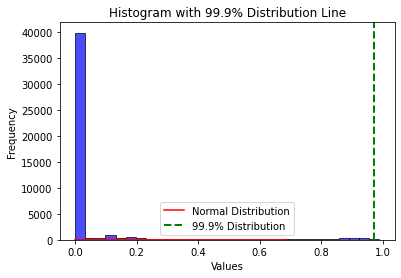

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate sample data (replace this with your own list of values)
data = likelihoodlist

# Create histogram
plt.hist(data, bins=30,  alpha=0.7, color='blue', edgecolor='black')

# Calculate mean and standard deviation for the data
mean = np.mean(data)
std_dev = np.std(data)

# Create a range of values for x-axis based on the mean and standard deviation
x = np.linspace(0, mean + 3 * std_dev, 100)

# Plot the normal distribution curve (PDF) based on the mean and standard deviation
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', label='Normal Distribution')

# Calculate the values for the 95% distribution (replace 0.025 and 0.975 if you need a different confidence interval)

upper_bound = np.percentile(data, 99.9)

# Plot vertical lines for the 95% distribution
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='99.9% Distribution')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with 99.9% Distribution Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

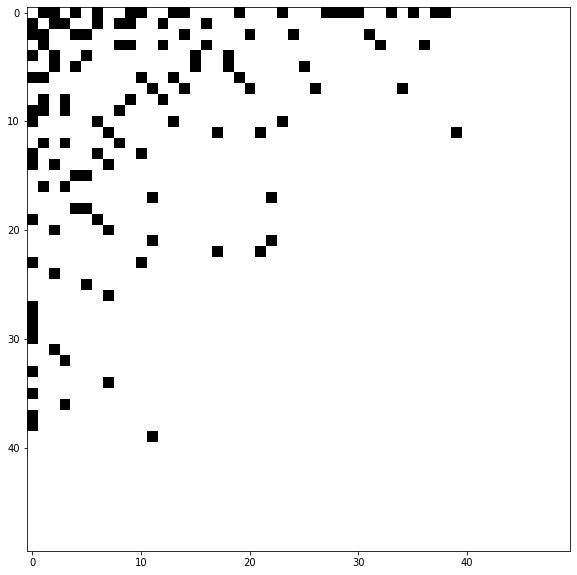

In [102]:
G=nx.from_numpy_array(np.array(simutable[8][45][15]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

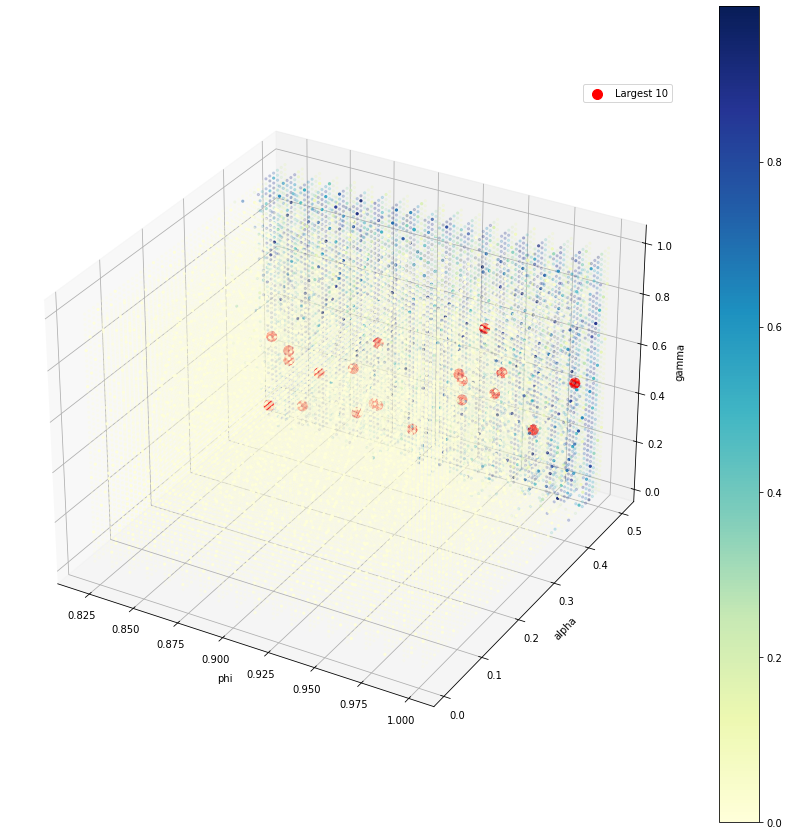

In [83]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 19)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.2 + 0.8 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -20)[-20:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest], y_flat[indices_largest], z_flat[indices_largest],
           c='red', s=100, marker='o', label='Largest 10', alpha=1.0)

# Show the legend
ax.legend()


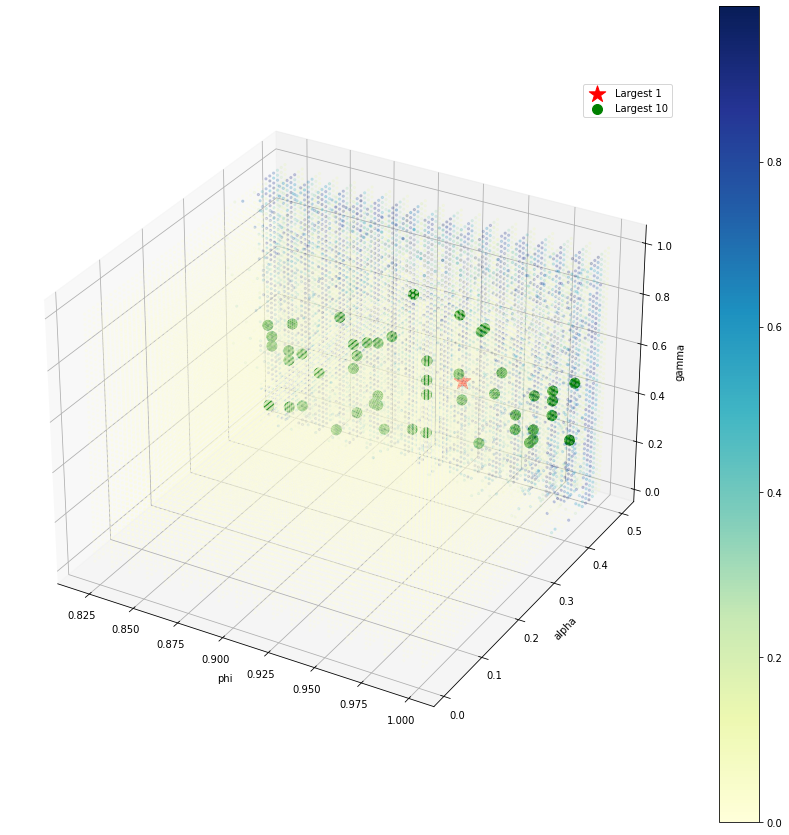

In [76]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 19)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.2 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Largest 1', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Largest 10', alpha=1.0)


# Show the legend
ax.legend()

plt.show()

In [77]:
np.mean(x_flat[indices_largest])

0.9022000000000001

In [78]:
np.mean(y_flat[indices_largest])

0.45860000000000006

In [79]:
np.mean(z_flat[indices_largest])

0.31960000000000005

In [80]:
np.std(x_flat[indices_largest])

0.052850354776481874

In [81]:
np.std(y_flat[indices_largest])

0.007485986908885167

In [82]:
np.std(z_flat[indices_largest])

0.15244618722683753

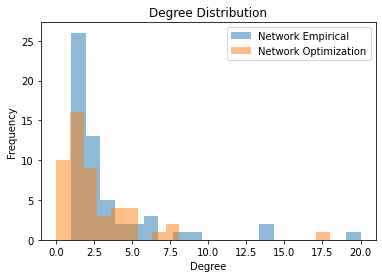

In [103]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

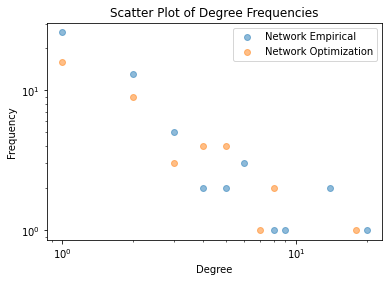

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network Empirical')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network Optimization')


plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree Frequencies')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

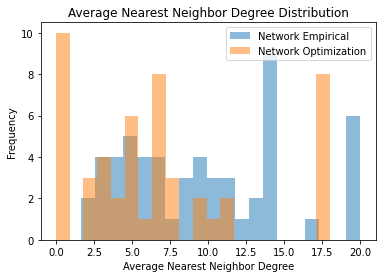

In [105]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Average Nearest Neighbor Degree Distribution')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

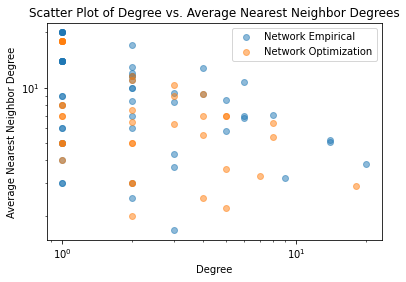

In [106]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network Empirical')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network Optimization')

plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
plt.xlabel('Degree')
plt.ylabel('Average Nearest Neighbor Degree')
plt.legend()
plt.show()

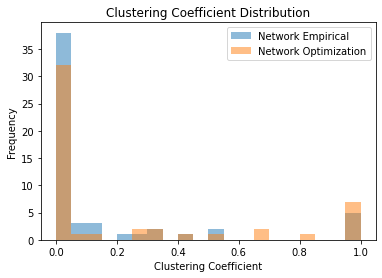

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()


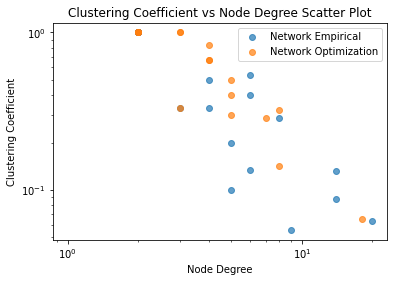

In [108]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network Empirical', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network Optimization', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


plt.title('Clustering Coefficient vs Node Degree Scatter Plot')
plt.xlabel('Node Degree')
plt.ylabel('Clustering Coefficient')
plt.legend()
plt.show()